In [37]:
import pandas as pd
from pandas import read_csv
from datetime import datetime

In [38]:
date_parser = lambda d: datetime.strptime(d, '%Y%m')

# Read Dataset from CSV into Pandas Dataframe.
data_df = read_csv(
    '../../data/data.csv',
    names=['date', 'temperature'],
    dtype={'date': 'str', 'temperature': 'float'},
    parse_dates=['date'],
    date_parser=date_parser
)
date_df = data_df.index
temperature_df = data_df[['temperature']]

# Convert Pandas Dataframe to Numpy Array.
data_np = data_df.to_numpy()
date_np = data_np[:,0]
temperature_np = data_np[:,1]

date
1880-01-01   NaN
1880-02-01   NaN
1880-03-01   NaN
1880-04-01   NaN
1880-05-01   NaN
              ..
2020-04-01   NaN
2020-05-01   NaN
2020-06-01   NaN
2020-07-01   NaN
2020-08-01   NaN
Name: trend, Length: 1688, dtype: float64
date
1880-01-01   -0.006875
1880-02-01   -0.005700
1880-03-01    0.010332
1880-04-01    0.004769
1880-05-01    0.001328
                ...   
2020-04-01    0.004769
2020-05-01    0.001328
2020-06-01    0.000989
2020-07-01    0.001458
2020-08-01    0.000851
Name: seasonal, Length: 1688, dtype: float64
date
1880-01-01   NaN
1880-02-01   NaN
1880-03-01   NaN
1880-04-01   NaN
1880-05-01   NaN
              ..
2020-04-01   NaN
2020-05-01   NaN
2020-06-01   NaN
2020-07-01   NaN
2020-08-01   NaN
Name: resid, Length: 1688, dtype: float64
date
1880-01-01   -0.06
1880-02-01   -0.15
1880-03-01   -0.10
1880-04-01   -0.05
1880-05-01   -0.10
              ... 
2020-04-01    1.05
2020-05-01    0.95
2020-06-01    0.92
2020-07-01    0.91
2020-08-01    0.94
Length: 1688, d

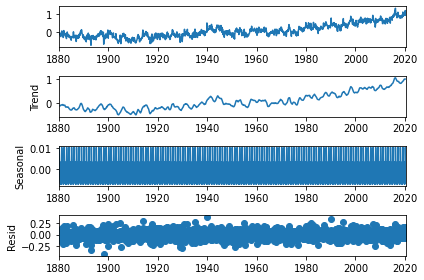

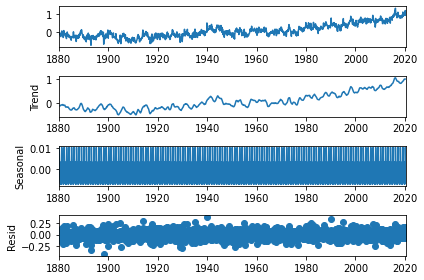

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

test_df = read_csv(
    '../../data/data.csv',
    names=['date', 'temperature'],
    dtype={'date': 'str', 'temperature': 'float'},
    parse_dates=['date'],
    date_parser=date_parser,
    index_col='date'
)

decompose_res = seasonal_decompose(test_df, model='additive', freq=12)
print(decompose_res.trend)
print(decompose_res.seasonal)
print(decompose_res.resid)
print(decompose_res.observed)
decompose_res.plot()